In [1]:
import pandas as pd

In [12]:
df=pd.read_csv(r"C:\Users\ARAVIND\Downloads\archive (38)\Electric_Production.csv",parse_dates=["DATE"])

In [15]:
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [14]:
df.isnull().sum()

DATE     0
Value    0
dtype: int64

In [18]:
#setting index of data as date

df=df.set_index(["DATE"])


In [19]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


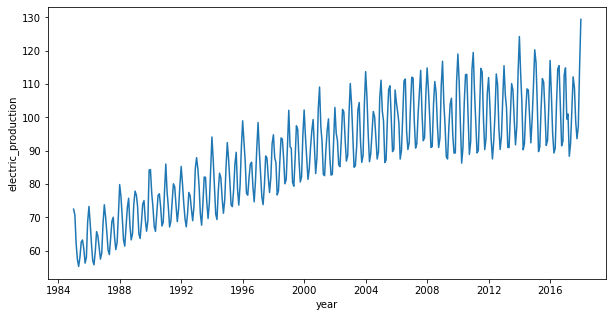

In [20]:
#plotting data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlabel('year')
plt.ylabel("electric_production")
plt.plot(df)

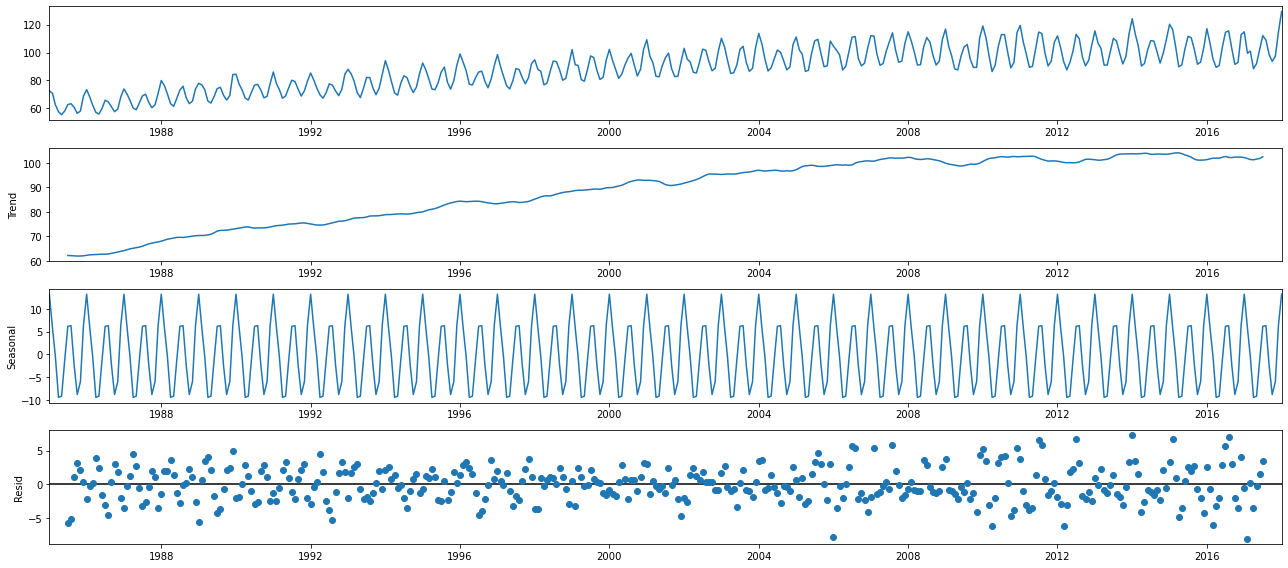

In [22]:
#analysing trend, seasonality and residuals
import statsmodels.api as sm

from pylab import rcParams

rcParams['figure.figsize']=18,8
decomposition_furniture = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition_furniture.plot()
plt.show()

In [23]:
#checking if time series data is stationary or not using augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(df)

(-2.2569903500472455,
 0.18621469116586759,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [27]:
#since p value is less than .05

rollingmean=df.rolling(window=15).mean()



In [28]:
new_df=(df-rollingmean).dropna()
new_df

,Value
DATE,
1986-03-01,-1.078080
1986-04-01,-5.235793
1986-05-01,-5.464440
1986-06-01,-1.207660
1986-07-01,4.104400
...,...
2017-09-01,-4.560113
2017-10-01,-8.166747
2017-11-01,-3.232547


In [30]:
#checking if time series data is stationary or not using augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(new_df)

(-5.200226897607536,
 8.782710658161055e-06,
 15,
 367,
 {'1%': -3.448294490928673,
  '5%': -2.869447722240253,
  '10%': -2.570982681065269},
 1742.800224229363)

In [31]:
#remove seasonality

seasonality_remove=new_df-(new_df.shift())
seasonality_remove

,Value
DATE,
1986-03-01,NaN
1986-04-01,-4.157713
1986-05-01,-0.228647
1986-06-01,4.256780
1986-07-01,5.312060
...,...
2017-09-01,-9.954327
2017-10-01,-3.606633
2017-11-01,4.934200


C:\Users\ARAVIND\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


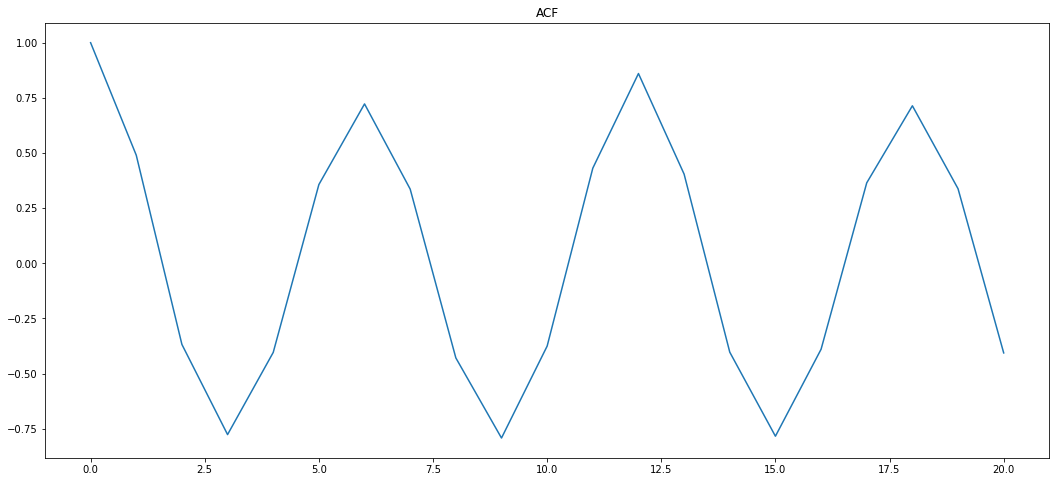

In [32]:
#plotting acf and pcf
from statsmodels.tsa.stattools import acf,pacf
p_acf=acf(new_df,nlags=20)
plt.title("ACF")
plt.plot(p_acf)

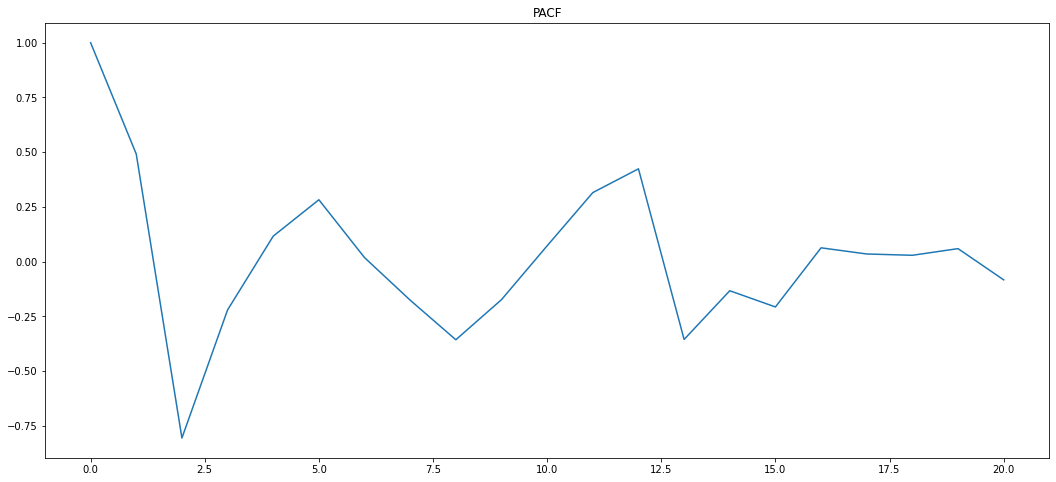

In [34]:
#PACF
p_acf=pacf(new_df,nlags=20)
plt.title("PACF")
plt.plot(p_acf)

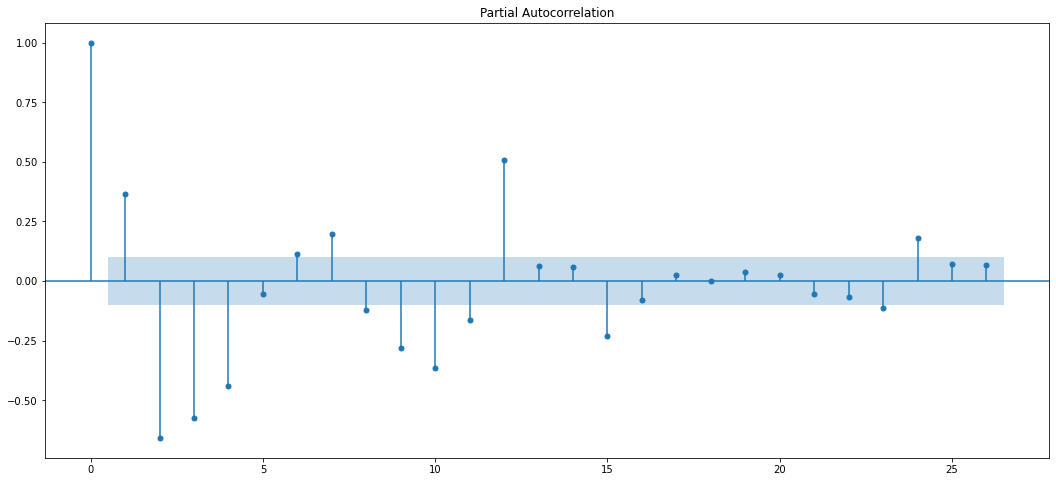

In [35]:
#PARTIAL AUTO CORRELATION / DIFFRENT VIEW
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
picpacf=plot_pacf(new_df.diff().dropna())

In [ ]:
#p=2

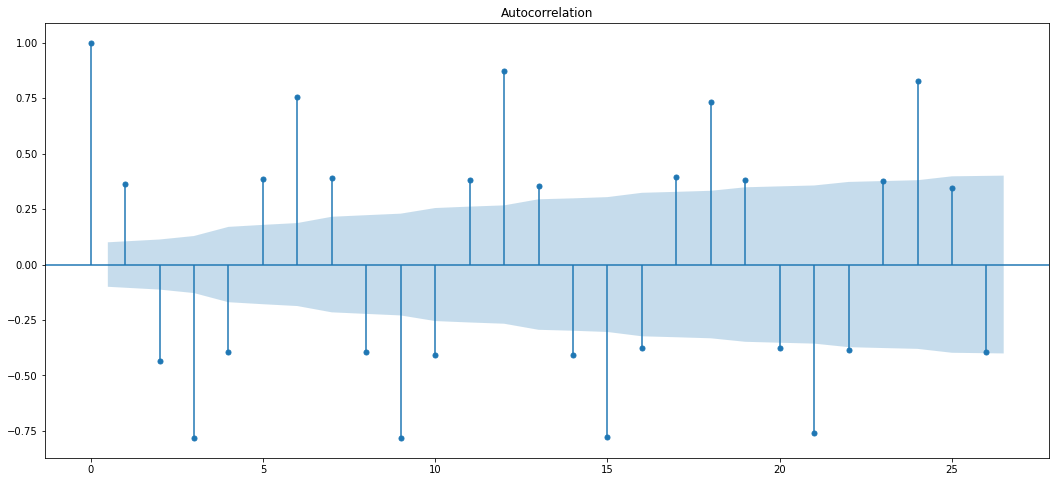

In [36]:
picpacf=plot_acf(new_df.diff().dropna())

In [ ]:
#q=2

In [37]:
print(len(new_df))

383


In [38]:
#splitting into train and test data
split_val=new_df.values
train=new_df[:len(split_val)-10]
test=new_df[len(split_val)-10:]

In [39]:
#fitting model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(2,0,2))
model=model.fit(method_kwargs={'warn_convergence':False})
model.summary()

C:\Users\ARAVIND\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ARAVIND\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                  373
Model:                     ARMA(2, 2)   Log Likelihood                -961.853
Method:                       css-mle   S.D. of innovations              3.164
Date:                Fri, 27 Jan 2023   AIC                           1935.705
Time:                        21:44:33   BIC                           1959.235
Sample:                    03-01-1986   HQIC                          1945.048
                         - 03-01-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7414      0.179      4.133      0.000       0.390       1.093
ar.L1.Value     0.9948      0.006    171.575      0.000       0.983       1.006
ar.L2.Value    -0.9945      0.005   -212.786      0.000      -1.004      -0.985
ma.L1.Value    -0.7695      0.051    -15.037      0.000      -0.870      -0.669
ma.L2.Value     0.8633      0.031     28.116      0.000       0.803       0.923
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5002           -0.8691j            1.0028           -0.1669
AR.2            0.5002           +0.8691j            1.0028            0.1669
MA.1            0.4457           -0.9797j            1.0763           -0.1821
MA.2            0.4457           +0.9797j            1.0763            0.1821
-----------------------------------------------------------------------------
"""

In [43]:
from sklearn.metrics import mean_squared_error
pred=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
ar_score=mean_squared_error(test,pred)
ar_score

26.530993189351697

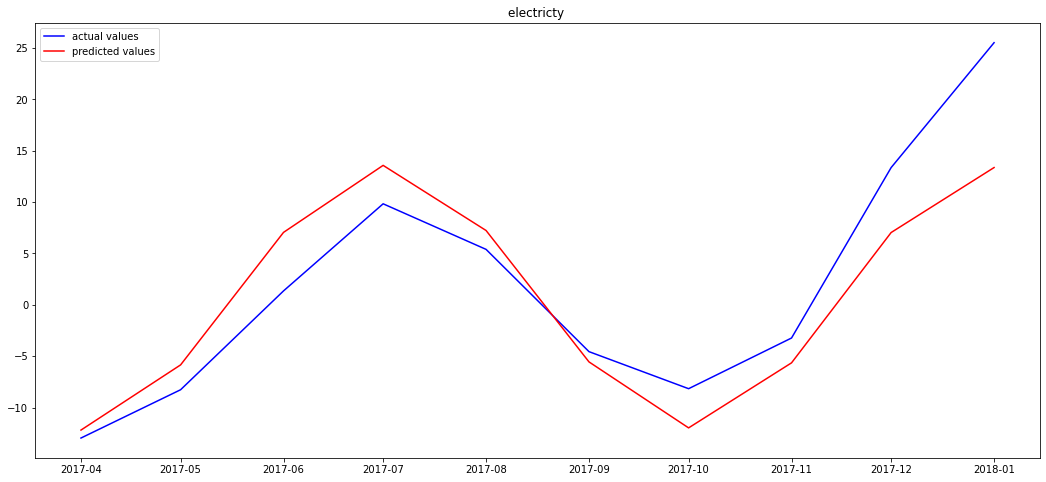

In [45]:
#predicted v/s actual

plt.plot(test,label="actual values",color="blue")
plt.plot(pred,label="predicted values",color="red")
plt.title("electricty ")
plt.legend()